In [107]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import ranksums
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import ranksums
import matplotlib.patches as mpatches
import os
from scipy.stats import ranksums
from matplotlib import font_manager
from scipy.optimize import curve_fit

In [108]:
if not os.path.exists('lstmPlots'):
    os.mkdir('lstmPlots')

In [109]:
font_dirs = ['/storage/home/hcoda1/8/zmobille3/scratch/arial']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# font_manager.get_font_names()

plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=22
plt.rcParams['axes.titlesize']=22
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

In [32]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=2
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
folder='LSTMbayesdecodeDataShuffle'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

# ax[0].set_title('hidden layer reconstructions ($\Delta t=$50 ms)',y=1.05,fontsize=15)
for nhi in range(numNh):
    nh = Nhvec[nhi]
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
#                 print(folder)
                for li in range(numLayers):
                    path = folder + f'/ytest_{layer}.npy'
                    ytest = np.load(path)
                    layer = layers[li]
                    path = folder + f'/ytest_pred_{layer}.npy'
                    ypred = np.load(path)
                    

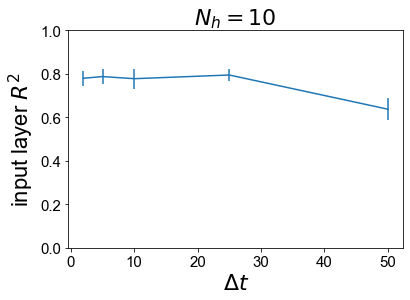

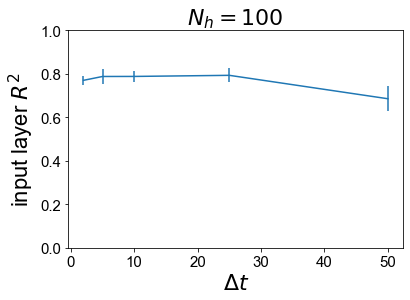

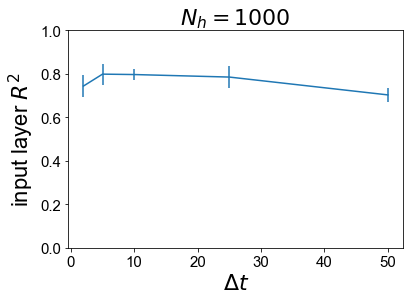

In [36]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=9
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'in'
folder='LSTMbayesdecodeDataShuffle'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))

    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2
    plt.title(f'$N_h={nh}$')
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
    plt.ylim(0,1)
    plt.errorbar(delta_t_list,r2means,r2sds)
    plt.ylabel('input layer $R^2$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()

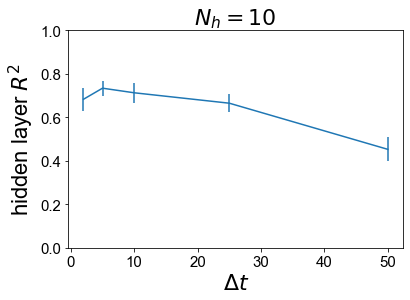

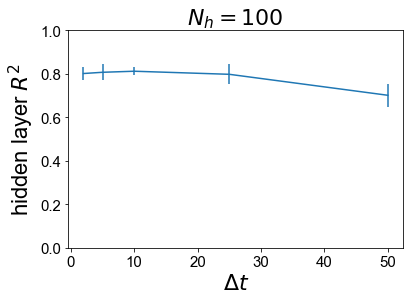

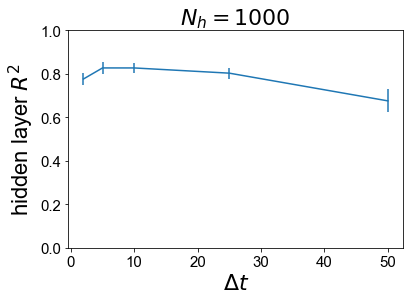

In [37]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=9
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'h'
folder='LSTMbayesdecodeDataShuffle'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))

    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2
    plt.title(f'$N_h={nh}$')
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
    plt.ylim(0,1)
    plt.errorbar(delta_t_list,r2means,r2sds)
    plt.ylabel('hidden layer $R^2$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()

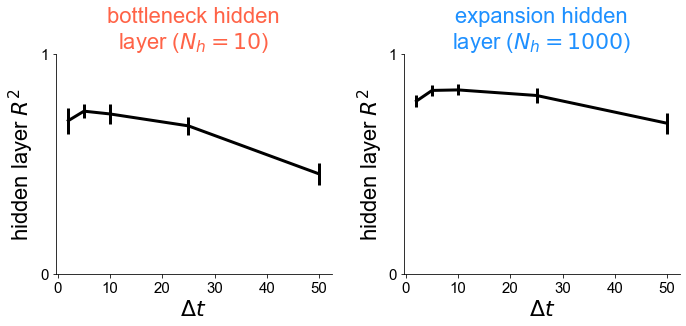

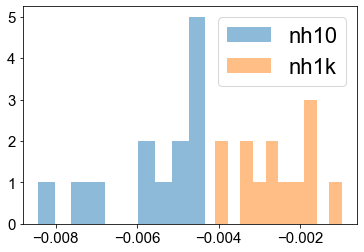

RanksumsResult(statistic=-4.333333333333333, pvalue=7.343423836894689e-06)

In [118]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=13
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'h'
folder='LSTMbayesdecodeDataShuffle'
Nhvec = [10,1000]; numNh=len(Nhvec)
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

slopes = np.zeros((numstimseeds,numNh))

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for nhi in range(numNh):
    nh = Nhvec[nhi]
    r2s = np.zeros((numstimseeds,numDeltas))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2
#                 Xpre = ytest.flatten()
#                 X = np.reshape(Xpre,(len(Xpre),1))
#                 y = ypred.flatten()
#                 mi = mutual_info_regression(X,y)[0]/np.log(2)
#                 mis[stimseed,dti] = mi*(mi>0)
        r2_v_dt = r2s[stimseed,:]
        m,b = np.polyfit(delta_t_list,r2_v_dt,1)
        slopes[stimseed,nhi] = m
#         ax[nhi].plot(delta_t_list,mi_v_dt,linewidth=0.5,color='gray')
#     ax[nhi].set_title(f'$N_h={nh}$')
    means = r2s.mean(axis=0)
    sds = r2s.std(axis=0)
    ax[nhi].set_ylim(0,1)
    ax[nhi].errorbar(delta_t_list,means,sds,color='black',linewidth=3)
    ax[nhi].set_ylabel('hidden layer $R^2$')
    ax[nhi].set_xlabel('$\Delta t$')
    ax[nhi].set_yticks([0,1])
sns.despine()
plt.tight_layout()
plt.savefig(f'lstmPlots/R2_v_dt_twoNh_{layer}.png',bbox_inches='tight',dpi=200)
# plt.savefig(f'lstmPlots/R2_v_dt_twoNh_{layer}.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()
    
nh10slopes = slopes[:,0]
nh1kslopes = slopes[:,1]
plt.hist(nh10slopes,label='nh10',alpha=0.5)
plt.hist(nh1kslopes,label='nh1k',alpha=0.5)
plt.legend()
plt.show()

ranksums(nh10slopes, nh1kslopes, 'less')

7.343423836894689e-06


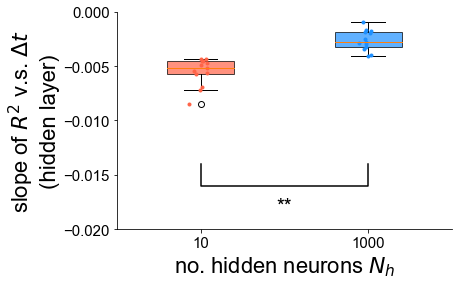

In [119]:
slopes=np.transpose(np.vstack((nh10slopes,nh1kslopes)))
# slopes.shape
bplot=plt.boxplot(slopes,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for i in [1,2]:
    clr=clrs[i-1]
    y=slopes[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
    
stat, pval = ranksums(slopes[:,0], slopes[:,1], alternative='less')
if pval < 0.05:
    p='**'
else:
    p='n.s.'
print(pval)

x1, x2 = 1, 2  
y, h, col = -0.014, 0.002, 'k'
plt.plot([x1, x1, x2, x2], [y, y-h, y-h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-1.5*h, p, ha='center', va='top', color=col, fontsize=20)

plt.ylim(-0.02,0)
plt.ylabel('slope of $R^2$ v.s. $\Delta t$\n(hidden layer)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')
sns.despine()
plt.savefig(f'lstmPlots/R2slope_boxplot_{layer}.png',bbox_inches='tight',dpi=200)

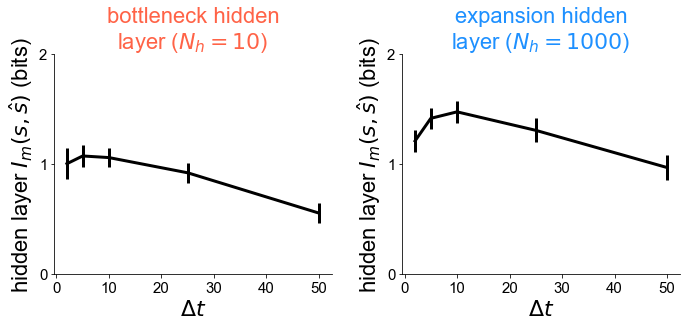

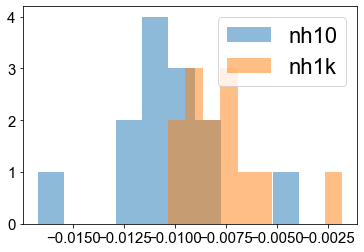

RanksumsResult(statistic=-2.8461538461538463, pvalue=0.0022125405151651673)

In [115]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=13
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'h'
folder='LSTMbayesdecodeDataShuffle'
Nhvec = [10,1000]; numNh=len(Nhvec)
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

slopes = np.zeros((numstimseeds,numNh))

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for nhi in range(numNh):
    nh = Nhvec[nhi]
    mis = np.zeros((numstimseeds,numDeltas))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                Xpre = ytest.flatten()
                X = np.reshape(Xpre,(len(Xpre),1))
                y = ypred.flatten()
                mi = mutual_info_regression(X,y)[0]/np.log(2)
                mis[stimseed,dti] = mi*(mi>0)
        mi_v_dt = mis[stimseed,:]
        m,b = np.polyfit(delta_t_list,mi_v_dt,1)
        slopes[stimseed,nhi] = m
#         ax[nhi].plot(delta_t_list,mi_v_dt,linewidth=0.5,color='gray')
#     ax[nhi].set_title(f'$N_h={nh}$')
    mimeans = mis.mean(axis=0)
    misds = mis.std(axis=0)
    ax[nhi].set_ylim(0,2)
    ax[nhi].errorbar(delta_t_list,mimeans,misds,color='black',linewidth=3)
    ax[nhi].set_ylabel('hidden layer $I_m(s,\hat{s})$ (bits)')
    ax[nhi].set_xlabel('$\Delta t$')
    ax[nhi].set_yticks([0,1,2])
sns.despine()
plt.tight_layout()
plt.savefig(f'lstmPlots/Im_v_dt_twoNh_{layer}.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()
    
nh10slopes = slopes[:,0]
nh1kslopes = slopes[:,1]
plt.hist(nh10slopes,label='nh10',alpha=0.5)
plt.hist(nh1kslopes,label='nh1k',alpha=0.5)
plt.legend()
plt.show()

ranksums(nh10slopes, nh1kslopes, 'less')

0.004075485796751346


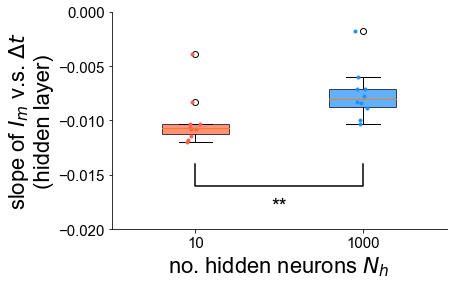

In [94]:
slopes=np.transpose(np.vstack((nh10slopes,nh1kslopes)))
# slopes.shape
bplot=plt.boxplot(slopes,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for i in [1,2]:
    clr=clrs[i-1]
    y=slopes[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
    
stat, pval = ranksums(slopes[:,0], slopes[:,1], alternative='less')
if pval < 0.05:
    p='**'
else:
    p='n.s.'
print(pval)

x1, x2 = 1, 2  
y, h, col = -0.014, 0.002, 'k'
plt.plot([x1, x1, x2, x2], [y, y-h, y-h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-1.5*h, p, ha='center', va='top', color=col, fontsize=20)

plt.ylim(-0.02,0)
plt.ylabel('slope of $I_m$ v.s. $\Delta t$\n(hidden layer)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')
sns.despine()
plt.savefig(f'lstmPlots/Imslope_boxplot_{layer}.png',bbox_inches='tight',dpi=200)

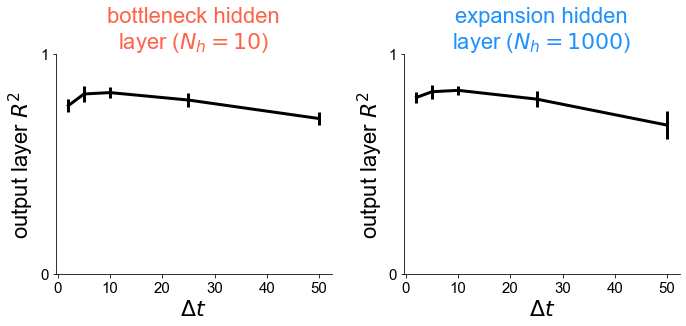

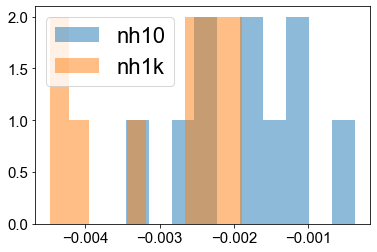

RanksumsResult(statistic=2.343379732657209, pvalue=0.009554961103422218)

In [126]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'out'
folder='LSTMbayesdecodeDataShuffle'
Nhvec = [10,1000]; numNh=len(Nhvec)
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

slopes = np.zeros((numstimseeds,numNh))

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for nhi in range(numNh):
    nh = Nhvec[nhi]
    r2s = np.zeros((numstimseeds,numDeltas))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2
#                 Xpre = ytest.flatten()
#                 X = np.reshape(Xpre,(len(Xpre),1))
#                 y = ypred.flatten()
#                 mi = mutual_info_regression(X,y)[0]/np.log(2)
#                 mis[stimseed,dti] = mi*(mi>0)
        r2_v_dt = r2s[stimseed,:]
        m,b = np.polyfit(delta_t_list,r2_v_dt,1)
        slopes[stimseed,nhi] = m
#         ax[nhi].plot(delta_t_list,mi_v_dt,linewidth=0.5,color='gray')
#     ax[nhi].set_title(f'$N_h={nh}$')
    means = r2s.mean(axis=0)
    sds = r2s.std(axis=0)
    ax[nhi].set_ylim(0,1)
    ax[nhi].errorbar(delta_t_list,means,sds,color='black',linewidth=3)
    ax[nhi].set_ylabel('output layer $R^2$')
    ax[nhi].set_xlabel('$\Delta t$')
    ax[nhi].set_yticks([0,1])
sns.despine()
plt.tight_layout()
plt.savefig(f'lstmPlots/R2_v_dt_twoNh_{layer}.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()
    
nh10slopes = slopes[:,0]
nh1kslopes = slopes[:,1]
plt.hist(nh10slopes,label='nh10',alpha=0.5)
plt.hist(nh1kslopes,label='nh1k',alpha=0.5)
plt.legend()
plt.show()

ranksums(nh10slopes, nh1kslopes, 'greater')

0.009554961103422218


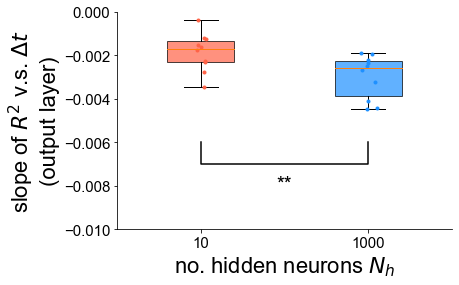

In [127]:
slopes=np.transpose(np.vstack((nh10slopes,nh1kslopes)))
# slopes.shape
bplot=plt.boxplot(slopes,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for i in [1,2]:
    clr=clrs[i-1]
    y=slopes[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
    
stat, pval = ranksums(slopes[:,0], slopes[:,1], alternative='greater')
if pval < 0.05:
    p='**'
else:
    p='n.s.'
print(pval)

x1, x2 = 1, 2  
y, h, col = -0.006, 0.001, 'k'
plt.plot([x1, x1, x2, x2], [y, y-h, y-h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-1.5*h, p, ha='center', va='top', color=col, fontsize=20)

plt.ylim(-0.01,0)
plt.ylabel('slope of $R^2$ v.s. $\Delta t$\n(output layer)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')
sns.despine()
plt.savefig(f'lstmPlots/R2slope_boxplot_{layer}.png',bbox_inches='tight',dpi=200)

FileNotFoundError: [Errno 2] No such file or directory: 'LSTMbayesdecodeDataShuffle/Nh1000/stimseed10/modelseed0/deltat2/ytest_pred_out.npy'

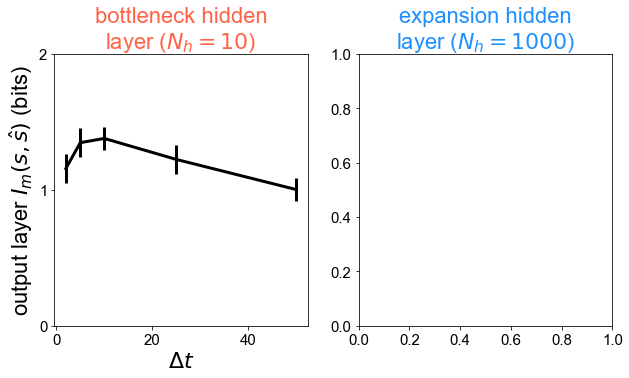

In [116]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=13
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'out'
folder='LSTMbayesdecodeDataShuffle'
Nhvec = [10,1000]; numNh=len(Nhvec)
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

slopes = np.zeros((numstimseeds,numNh))

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for nhi in range(numNh):
    nh = Nhvec[nhi]
    mis = np.zeros((numstimseeds,numDeltas))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                Xpre = ytest.flatten()
                X = np.reshape(Xpre,(len(Xpre),1))
                y = ypred.flatten()
                mi = mutual_info_regression(X,y)[0]/np.log(2)
                mis[stimseed,dti] = mi*(mi>0)
        mi_v_dt = mis[stimseed,:]
        m,b = np.polyfit(delta_t_list,mi_v_dt,1)
        slopes[stimseed,nhi] = m
#         ax[nhi].plot(delta_t_list,mi_v_dt,linewidth=0.5,color='gray')
#     ax[nhi].set_title(f'$N_h={nh}$')
    mimeans = mis.mean(axis=0)
    misds = mis.std(axis=0)
    ax[nhi].set_ylim(0,2)
    ax[nhi].errorbar(delta_t_list,mimeans,misds,color='black',linewidth=3)
    ax[nhi].set_ylabel('output layer $I_m(s,\hat{s})$ (bits)')
    ax[nhi].set_xlabel('$\Delta t$')
    ax[nhi].set_yticks([0,1,2])
sns.despine()
plt.tight_layout()
plt.savefig(f'lstmPlots/Im_v_dt_twoNh_{layer}.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()
    
nh10slopes = slopes[:,0]
nh1kslopes = slopes[:,1]
plt.hist(nh10slopes,label='nh10',alpha=0.5)
plt.hist(nh1kslopes,label='nh1k',alpha=0.5)
plt.legend()
plt.show()

ranksums(nh10slopes, nh1kslopes, 'greater')

0.08680866721247177


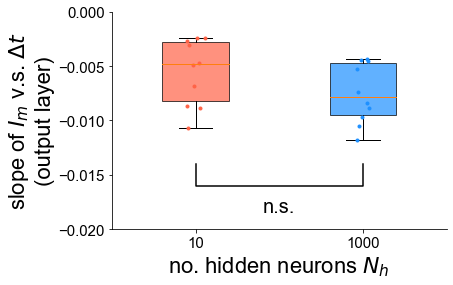

In [105]:
slopes=np.transpose(np.vstack((nh10slopes,nh1kslopes)))
# slopes.shape
bplot=plt.boxplot(slopes,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for i in [1,2]:
    clr=clrs[i-1]
    y=slopes[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
    
stat, pval = ranksums(slopes[:,0], slopes[:,1], alternative='greater')
if pval < 0.05:
    p='**'
else:
    p='n.s.'
print(pval)

x1, x2 = 1, 2  
y, h, col = -0.014, 0.002, 'k'
plt.plot([x1, x1, x2, x2], [y, y-h, y-h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-1.5*h, p, ha='center', va='top', color=col, fontsize=20)

plt.ylim(-0.02,0)
plt.ylabel('slope of $I_m$ v.s. $\Delta t$\n(output layer)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')
sns.despine()
plt.savefig(f'lstmPlots/Imslope_boxplot_{layer}.png',bbox_inches='tight',dpi=200)

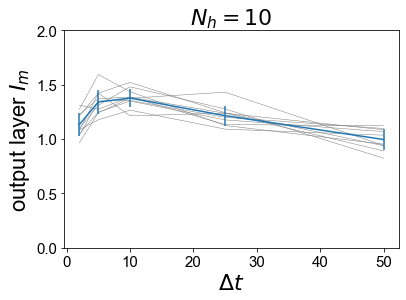

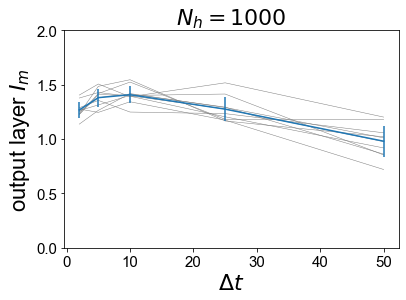

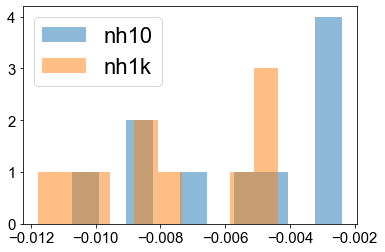

RanksumsResult(statistic=1.360672102833218, pvalue=0.08680866721247177)

In [62]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'out'
folder='LSTMbayesdecodeDataShuffle'
Nhvec = [10,1000]; numNh=len(Nhvec)
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

slopes = np.zeros((numstimseeds,numNh))

for nhi in range(numNh):
    nh = Nhvec[nhi]
    mis = np.zeros((numstimseeds,numDeltas))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                Xpre = ytest.flatten()
                X = np.reshape(Xpre,(len(Xpre),1))
                y = ypred.flatten()
                mi = mutual_info_regression(X,y)[0]/np.log(2)
                mis[stimseed,dti] = mi*(mi>0)
        mi_v_dt = mis[stimseed,:]
        m,b = np.polyfit(delta_t_list,mi_v_dt,1)
        slopes[stimseed,nhi] = m
        plt.plot(delta_t_list,mi_v_dt,linewidth=0.5,color='gray')
    plt.title(f'$N_h={nh}$')
    mimeans = mis.mean(axis=0)
    misds = mis.std(axis=0)
    plt.ylim(0,2)
    plt.errorbar(delta_t_list,mimeans,misds)
    plt.ylabel('output layer $I_m$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()
    
nh10slopes = slopes[:,0]
nh1kslopes = slopes[:,1]
plt.hist(nh10slopes,label='nh10',alpha=0.5)
plt.hist(nh1kslopes,label='nh1k',alpha=0.5)
plt.legend()
plt.show()

ranksums(nh10slopes, nh1kslopes, 'greater')

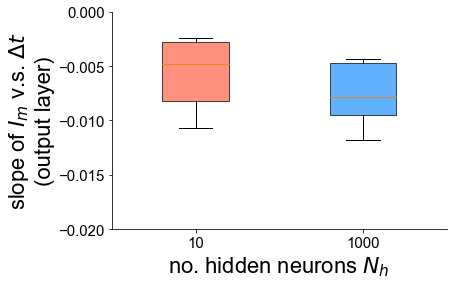

In [72]:
slopes=np.transpose(np.vstack((nh10slopes,nh1kslopes)))
# slopes.shape
bplot=plt.boxplot(slopes,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)

plt.ylim(-0.02,0)
plt.ylabel('slope of $I_m$ v.s. $\Delta t$\n(output layer)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')
sns.despine()

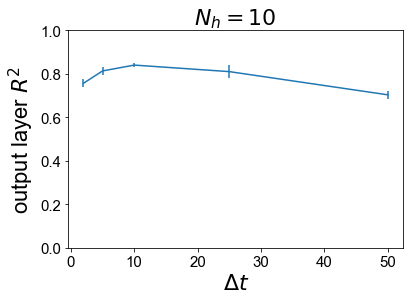

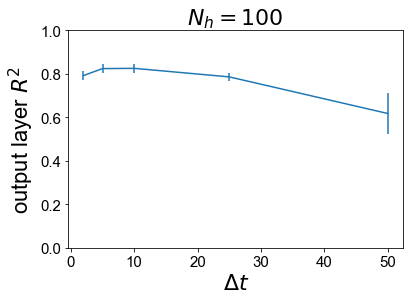

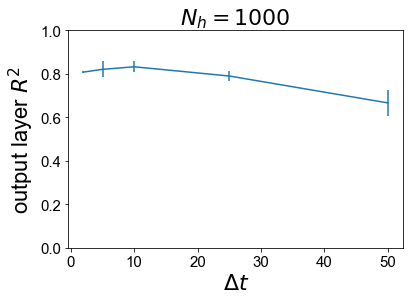

In [42]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=5
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'out'
folder='LSTMbayesdecodeDataShuffle'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))

    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + f'/ytest_{layer}.npy'
                ytest = np.load(path)
                path = folder + f'/ytest_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2
    plt.title(f'$N_h={nh}$')
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
    plt.ylim(0,1)
    plt.errorbar(delta_t_list,r2means,r2sds)
    plt.ylabel('output layer $R^2$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()

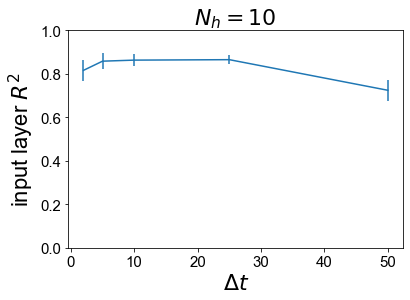

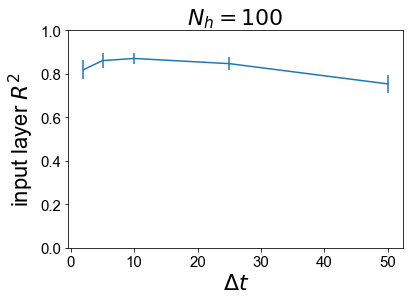

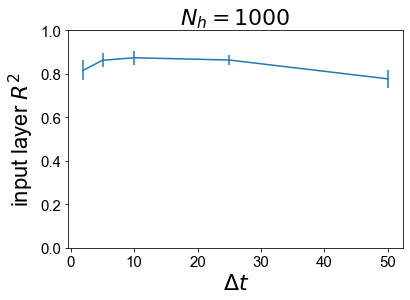

In [24]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'in'
layerName = 'input'
folder='LSTMbayesdecodeDataShuffle'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))

    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + '/ytrain.npy'
                ytest = np.load(path)
                path = folder + f'/ytrain_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2
    plt.title(f'$N_h={nh}$')
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
    plt.ylim(0,1)
    plt.errorbar(delta_t_list,r2means,r2sds)
    plt.ylabel(f'{layerName} layer $R^2$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()

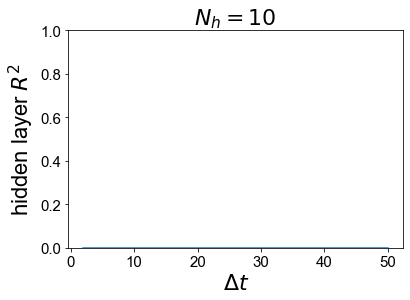

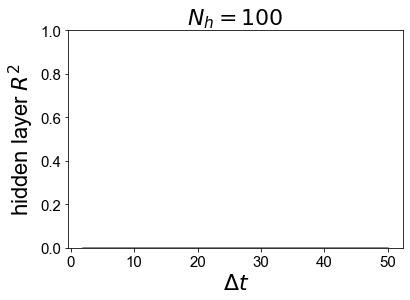

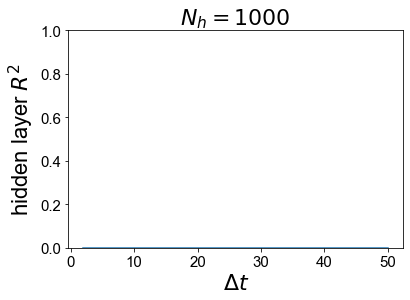

In [27]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'h'
layerName = 'hidden'
folder='LSTMbayesdecodeDataShuffle'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))

    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + '/ytrain.npy'
                ytest = np.load(path)
                path = folder + f'/ytrain_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2*(r2>0)
    plt.title(f'$N_h={nh}$')
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
    plt.ylim(0,1)
    plt.errorbar(delta_t_list,r2means,r2sds)
    plt.ylabel(f'{layerName} layer $R^2$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()

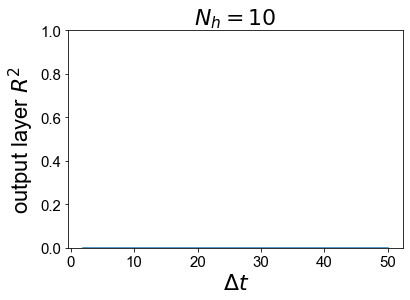

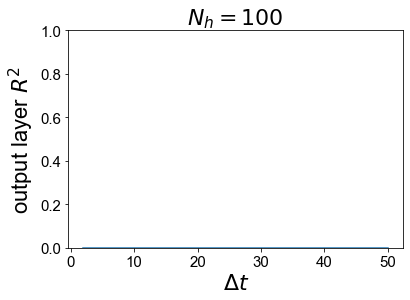

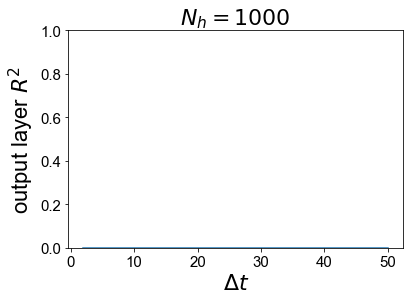

In [26]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'out'
layerName = 'output'
folder='LSTMbayesdecodeDataShuffle'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))

    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeDataShuffle/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + '/ytrain.npy'
                ytest = np.load(path)
                path = folder + f'/ytrain_pred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2*(r2>0)
    plt.title(f'$N_h={nh}$')
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
    plt.ylim(0,1)
    plt.errorbar(delta_t_list,r2means,r2sds)
    plt.ylabel(f'{layerName} layer $R^2$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()

In [4]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=2
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
folder='LSTMbayesdecodeData'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

# ax[0].set_title('hidden layer reconstructions ($\Delta t=$50 ms)',y=1.05,fontsize=15)
for nhi in range(numNh):
    nh = Nhvec[nhi]
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeData/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
#                 print(folder)
                path = folder + '/ytest.npy'
                ytest = np.load(path)
                for li in range(numLayers):
                    layer = layers[li]
                    path = folder + f'/ypred_{layer}.npy'
                    ypred = np.load(path)
                    
    
#     folder = 'LSTMbayesdecodeData/Nh%s/pcon0.3/seed%s/deltat%s'%(nh,seed,deltat)
#     ytest_path = folder + '/ytest.npy'
#     ytest = np.load(ytest_path)
#     ax[nhi].plot(ytest[:,dimi],color='black',linewidth=2)
# #     ypred_avg = np.zeros(ytest.shape)
#     for seed in range(numseeds):
#         folder = 'LSTMbayesdecodeData/Nh%s/pcon0.3/seed%s/deltat%s'%(nh,seed,deltat)
#         ypred_path = folder + '/ypred_h.npy'
#         ypred = np.load(ypred_path)
#         ax[nhi].plot(ypred[:,dimi],linewidth=0.5,color=color,alpha=0.5)
#         ypred_avg += ypred
#     ypred_avg /= numseeds
#     ax[nhi].plot(ypred_avg[:,dimi],color=color,linewidth=2)
#     ax[nhi].set_xlim([0,250])
#     ax[nhi].set_ylim([-1,1])
#     ax[nhi].set_ylabel('$N_h=%s$'%nh,fontsize=15)
# fig.text(-0.05, 0.5, 'hidden layer\n reconstructions ($\Delta t=$50 ms)', va='center', rotation='vertical')
# fig.text(-0.1, 0.13, 'hidden layer reconstructions', rotation='vertical',fontsize=18)
# fig.text(-0.03,0.35, '($\Delta t=$50 ms)', rotation='vertical',fontsize=18)
# ax[0].tick_params(labelbottom=False)
# ax[1].set_xlabel('time (ms)')
# sns.despine(offset=10)
# plt.savefig(f'lstmPlots/hidden_recs_deltat{deltat}.png',bbox_inches='tight',dpi=200)
# plt.savefig(f'lstmPlots/hidden_recs_deltat{deltat}.svg',bbox_inches='tight',dpi=200)
# plt.show()
# plt.close()
#         print(folder)

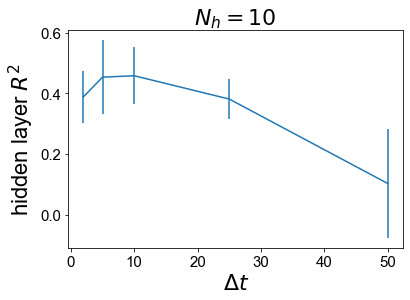

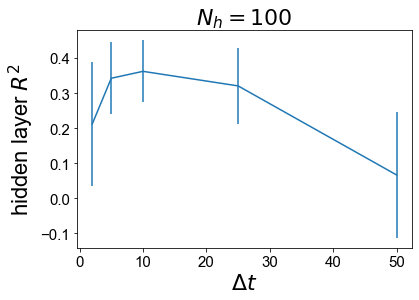

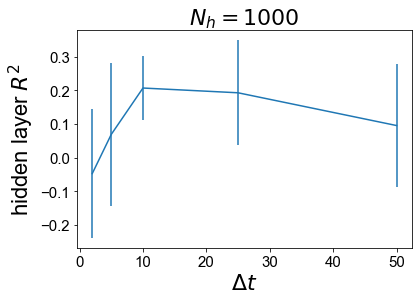

In [6]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'h'
folder='LSTMbayesdecodeData'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))

    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeData/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + '/ytest.npy'
                ytest = np.load(path)
                path = folder + f'/ypred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2s[stimseed,dti] = r2
    plt.title(f'$N_h={nh}$')
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
    plt.errorbar(delta_t_list,r2means,r2sds)
    plt.ylabel('hidden layer $R^2$')
    plt.xlabel('$\Delta t$')
    plt.show()
    plt.close()

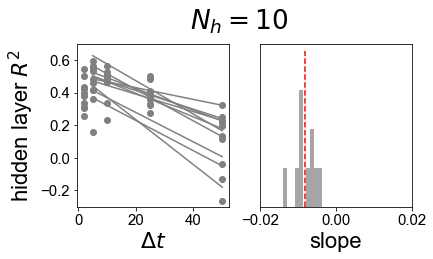

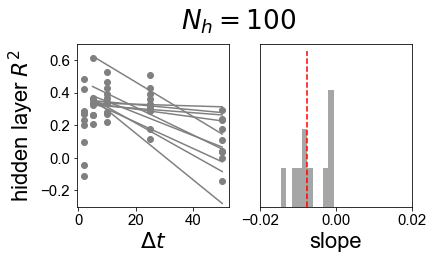

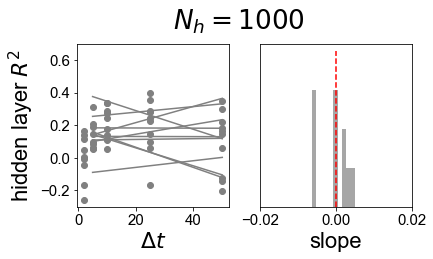

In [7]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
x = np.array(delta_t_list)
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1
    
omit=1 # number of deltat's to omit in fits

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'h'
folder='LSTMbayesdecodeData'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))
    slopes = np.zeros(numstimseeds)
    fig,ax = plt.subplots(1,2,figsize=(6,3))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            r2_v_deltat = []
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeData/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + '/ytest.npy'
                ytest = np.load(path)
                path = folder + f'/ypred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2_v_deltat.append(r2)
                r2s[stimseed,dti] = r2
            ax[0].plot(delta_t_list,r2_v_deltat,linewidth=1,color='gray',linestyle='',marker='o')
            m, b = np.polyfit(delta_t_list[omit:], r2_v_deltat[omit:], 1)
            slopes[stimseed] = m
#             print(m)
#             print(b)
            ax[0].plot(x[omit:],m*x[omit:]+b,color='gray')
    ax[1].hist(slopes,color='gray',alpha=0.7)
    med = np.median(slopes)
    ax[1].vlines(med,0,4,color='red',linestyle='--')
    ax[1].set_yticks([])
    ax[1].set_xlabel('slope')
    ax[1].set_xlim(-0.02,0.02)
    plt.suptitle(f'$N_h={nh}$',y=1.05)
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
#     plt.errorbar(delta_t_list,r2means,r2sds,color='black')
    ax[0].set_ylim([-0.3,0.7])
    ax[0].set_ylabel('hidden layer $R^2$')
    ax[0].set_xlabel('$\Delta t$')
    plt.show()
    plt.close()

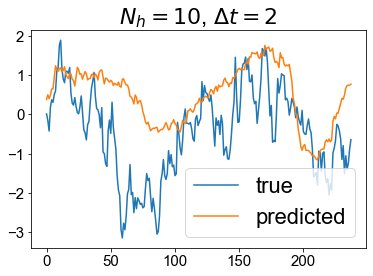

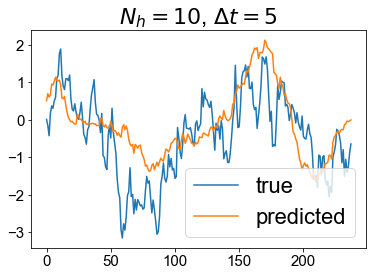

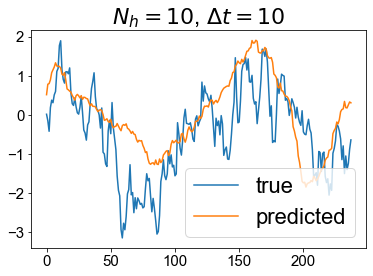

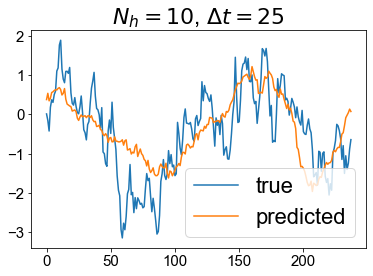

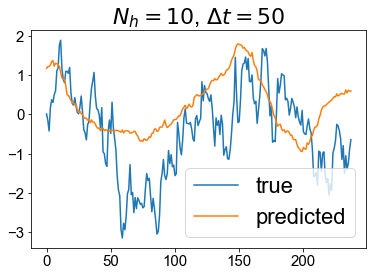

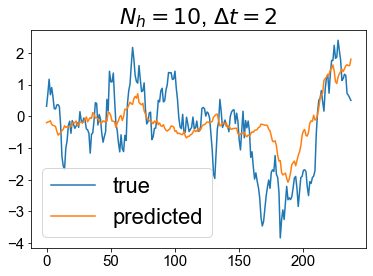

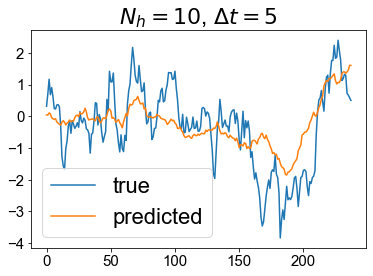

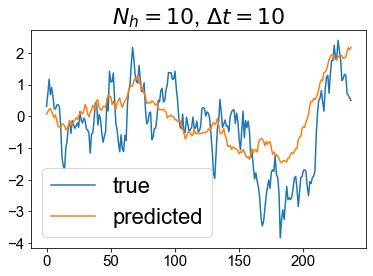

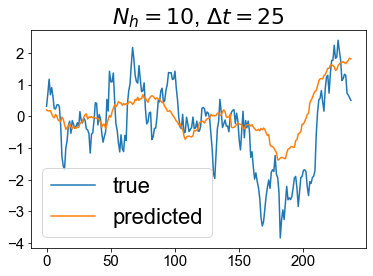

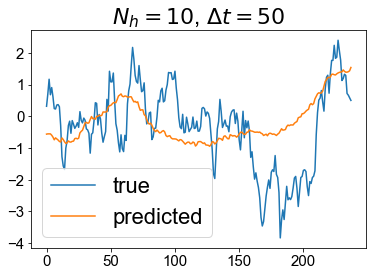

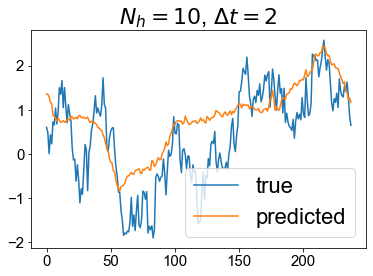

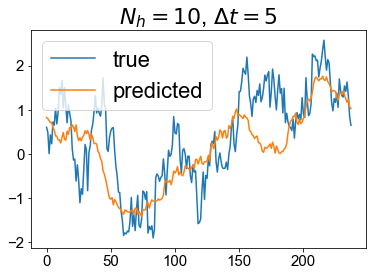

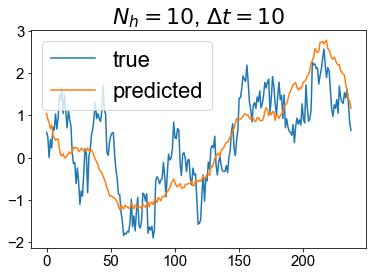

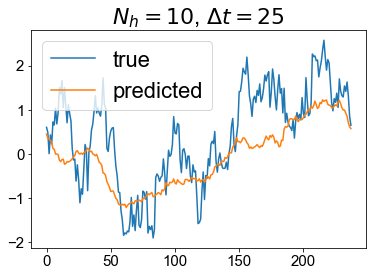

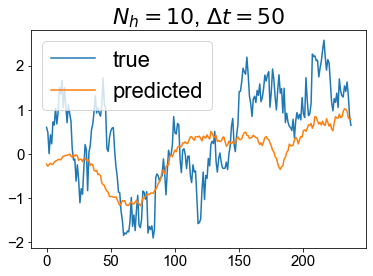

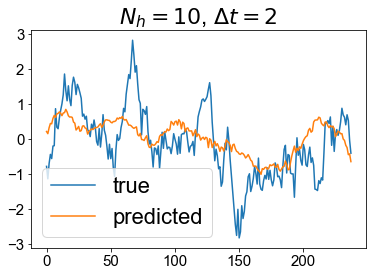

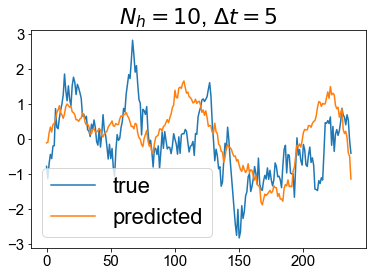

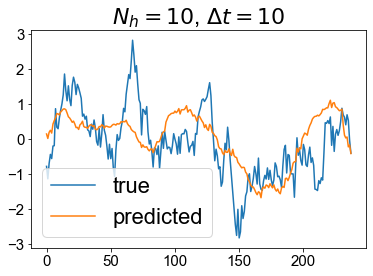

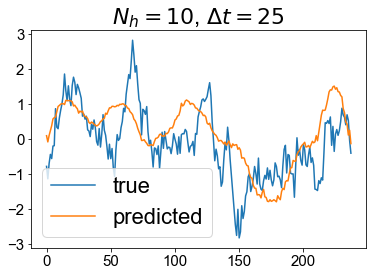

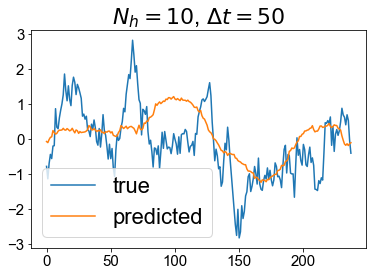

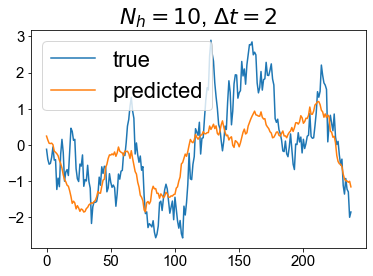

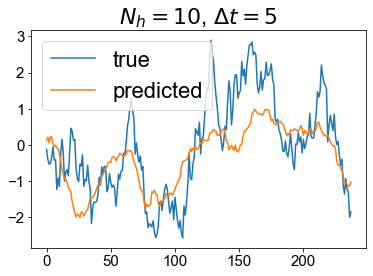

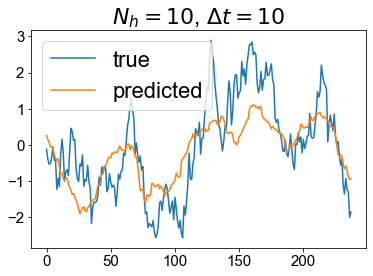

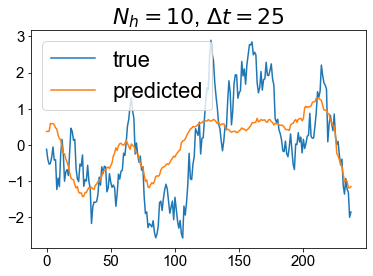

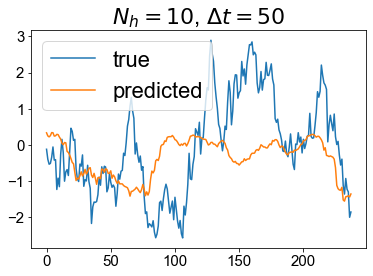

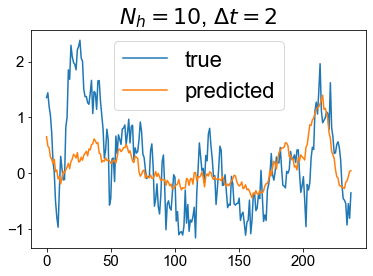

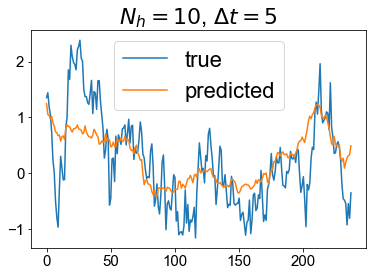

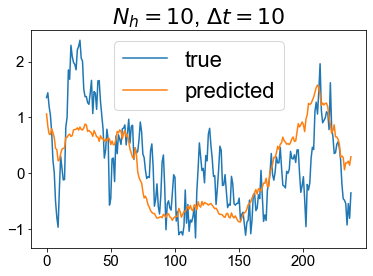

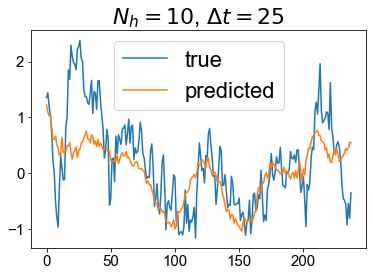

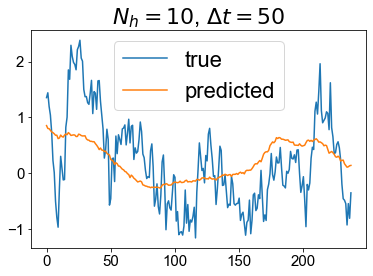

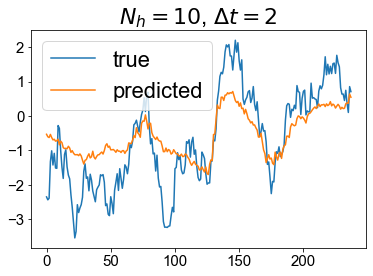

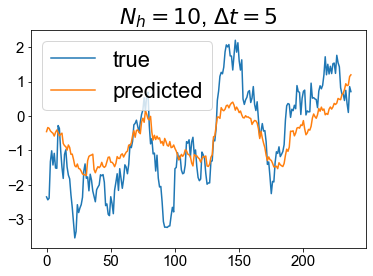

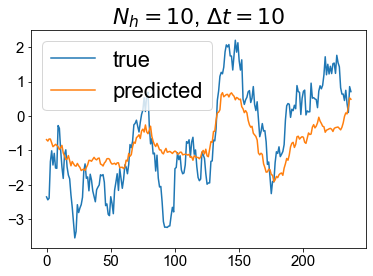

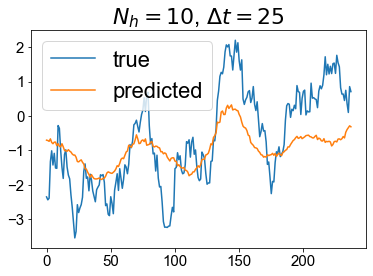

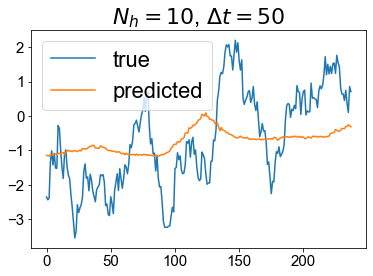

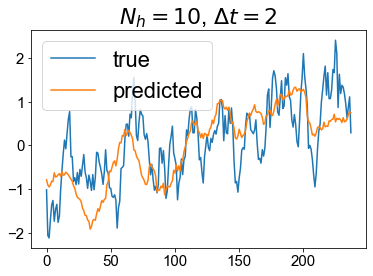

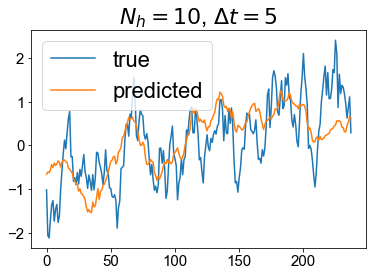

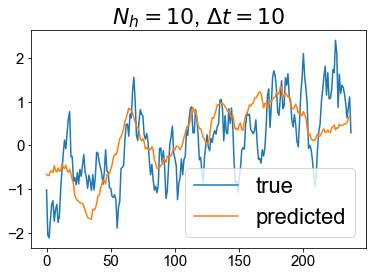

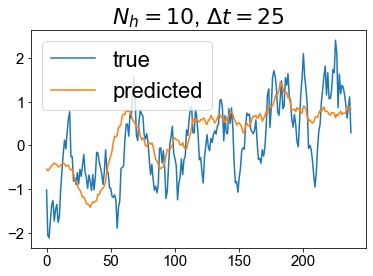

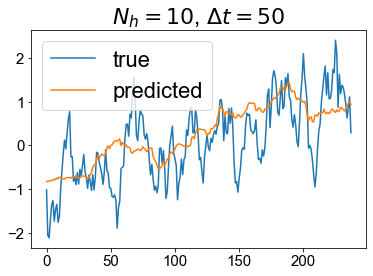

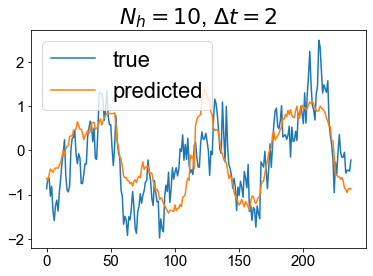

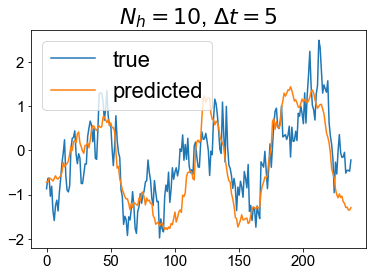

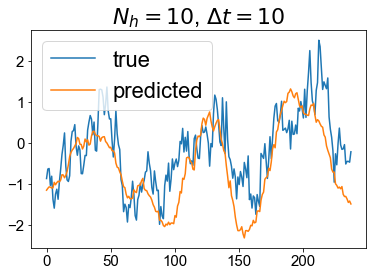

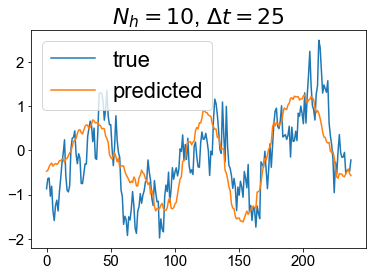

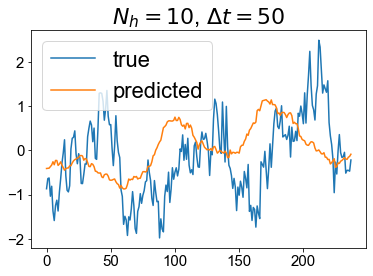

FileNotFoundError: [Errno 2] No such file or directory: 'LSTMbayesdecodeData/Nh10/stimseed9/modelseed0/deltat2/ypred_out.npy'

In [7]:
delta_t_list = [2,5,10,25,50]
x = np.array(delta_t_list)
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1
    
omit=1 # number of deltat's to omit in fits

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'out'
folder='LSTMbayesdecodeData'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))
    slopes = np.zeros(numstimseeds)
#     fig,ax = plt.subplots(1,2,figsize=(6,3))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            r2_v_deltat = []
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeData/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + '/ytest.npy'
                ytest = np.load(path)
                path = folder + f'/ypred_{layer}.npy'
                ypred = np.load(path)
                plt.title(f'$N_h={nh}$, $\Delta t={deltat}$')
                plt.plot(ytest[:,0],label='true')
                plt.plot(ypred[:,0],label='predicted')
                plt.legend()
                plt.show()
                plt.close()
#                 print(ypred.shape)
#                 plt.plot(ypred)
                
#                 r2 = r2_score(ytest,ypred)
#                 r2_v_deltat.append(r2)
#                 r2s[stimseed,dti] = r2
#             ax[0].plot(delta_t_list,r2_v_deltat,linewidth=1,color='gray',linestyle='',marker='o')
#             m, b = np.polyfit(delta_t_list[omit:], r2_v_deltat[omit:], 1)
#             slopes[stimseed] = m
# #             print(m)
# #             print(b)
#             ax[0].plot(x[omit:],m*x[omit:]+b,color='gray')
#     ax[1].hist(slopes,color='gray',alpha=0.7)
#     med = np.median(slopes)
#     ax[1].vlines(med,0,4,color='red',linestyle='--')
#     ax[1].set_yticks([])
#     ax[1].set_xlabel('slope')
#     ax[1].set_xlim(-0.02,0.02)
#     plt.suptitle(f'$N_h={nh}$',y=1.05)
#     r2means = r2s.mean(axis=0)
#     r2sds = r2s.std(axis=0)
# #     plt.errorbar(delta_t_list,r2means,r2sds,color='black')
#     ax[0].set_ylim([-0.3,0.7])
#     ax[0].set_ylabel('output layer $R^2$')
#     ax[0].set_xlabel('$\Delta t$')
#     plt.show()
#     plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'LSTMbayesdecodeData/Nh10/stimseed9/modelseed0/deltat2/ypred_out.npy'

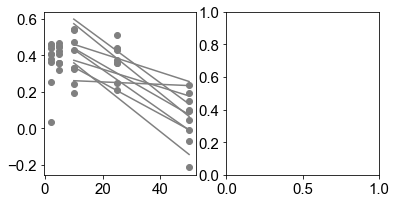

In [8]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
x = np.array(delta_t_list)
numDeltas = len(delta_t_list)
Nhvec=[10,100,1000]; numNh=len(Nhvec)

dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1
    
omit=2 # number of deltat's to omit in fits

# colors=['tomato','dodgerblue']

numstimseeds=10
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'out'
folder='LSTMbayesdecodeData'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

for nh in Nhvec:
    r2s = np.zeros((numstimseeds,numDeltas))
    slopes = np.zeros(numstimseeds)
    fig,ax = plt.subplots(1,2,figsize=(6,3))
    for stimseed in range(numstimseeds):
        for modelseed in range(nummodelseeds):
            r2_v_deltat = []
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                folder = 'LSTMbayesdecodeData/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
                path = folder + '/ytest.npy'
                ytest = np.load(path)
                path = folder + f'/ypred_{layer}.npy'
                ypred = np.load(path)
                r2 = r2_score(ytest,ypred)
                r2_v_deltat.append(r2)
                r2s[stimseed,dti] = r2
            ax[0].plot(delta_t_list,r2_v_deltat,linewidth=1,color='gray',linestyle='',marker='o')
            m, b = np.polyfit(delta_t_list[omit:], r2_v_deltat[omit:], 1)
            slopes[stimseed] = m
#             print(m)
#             print(b)
            ax[0].plot(x[omit:],m*x[omit:]+b,color='gray')
    ax[1].hist(slopes,color='gray',alpha=0.7)
    med = np.median(slopes)
    ax[1].vlines(med,0,4,color='red',linestyle='--')
    ax[1].set_yticks([])
    ax[1].set_xlabel('slope')
    ax[1].set_xlim(-0.02,0.02)
    plt.suptitle(f'$N_h={nh}$',y=1.05)
    r2means = r2s.mean(axis=0)
    r2sds = r2s.std(axis=0)
#     plt.errorbar(delta_t_list,r2means,r2sds,color='black')
    ax[0].set_ylim([-0.3,0.7])
    ax[0].set_ylabel('output layer $R^2$')
    ax[0].set_xlabel('$\Delta t$')
    plt.show()
    plt.close()

In [ ]:
# fig, ax = plt.subplots(2,figsize=(5,4))
# ax[0].set_xticks([])
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)



dim = 'x'
if dim == 'x':
    dimi=0
elif dim == 'y':
    dimi=1

# colors=['tomato','dodgerblue']

numstimseeds=2
nummodelseeds=1
layers=['in','h','out']; numLayers = len(layers)
layer = 'h'
folder='LSTMbayesdecodeData'
# !ls LSTMbayesdecodeData/Nh10/pcon0.3

r2s = np.zeros((numstimseeds,numDeltas))

for stimseed in range(numstimseeds):
    for modelseed in range(nummodelseeds):
        for dti in range(numDeltas):
            deltat = delta_t_list[dti]
            folder = 'LSTMbayesdecodeData/Nh%s/stimseed%s/modelseed%s/deltat%s'%(nh,stimseed,modelseed,deltat)
            path = folder + '/ytest.npy'
            ytest = np.load(path)
            path = folder + f'/ypred_{layer}.npy'
            ypred = np.load(path)
            r2 = r2_score(ytest,ypred)
            r2s[stimseed,dti] = r2
            
r2means = r2s.mean(axis=0)
r2sds = r2s.std(axis=0)
plt.errorbar(delta_t_list,r2means,r2sds)

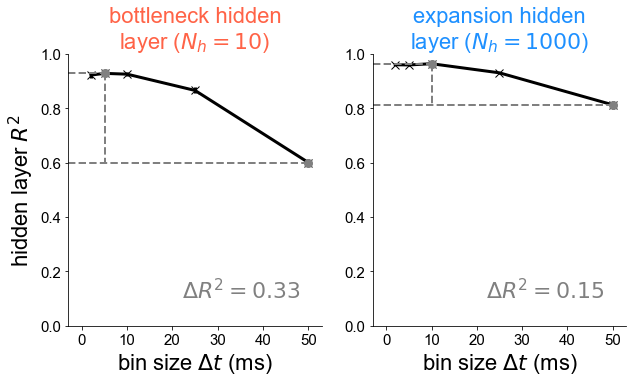

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 25
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']

pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        mean_R2s = all_R2s.mean(axis=0)
        maxi = np.argmax(mean_R2s)
        high = mean_R2s[maxi]
        mini = -1
        low = mean_R2s[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        ax[nhi].text(22,0.1,f'$\Delta R^2={high-low:.2}$',color='gray',fontsize=22)

        sd_R2s = all_R2s.std(axis=0)
        sem_R2s = sd_R2s/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_R2s,sem_R2s,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
        ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
        ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(f'{layerName} layer $R^2$')
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,1])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/R2_v_deltat_hidden.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/R2_v_deltat_hidden.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

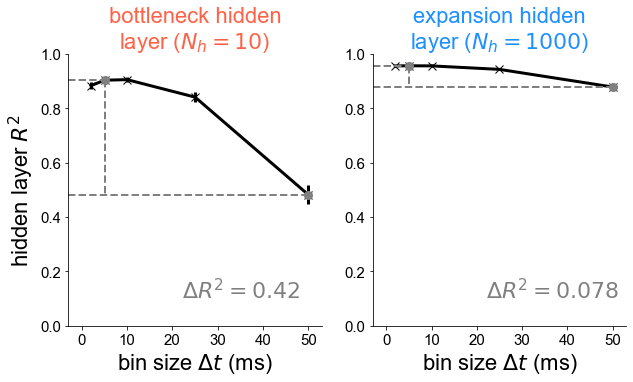

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 25
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        mean_R2s = all_R2s.mean(axis=0)
        maxi = np.argmax(mean_R2s)
        maxi = 1
        high = mean_R2s[maxi]
        mini = -1
        low = mean_R2s[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        ax[nhi].text(22,0.1,f'$\Delta R^2={high-low:.2}$',color='gray',fontsize=22)

        sd_R2s = all_R2s.std(axis=0)
        sem_R2s = sd_R2s/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_R2s,sem_R2s,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
        ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
        ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(f'{layerName} layer $R^2$')
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,1])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/R2_v_deltat_hidden.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/R2_v_deltat_hidden.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'LSTMbayesdecodeDataPredict/Nh10/pcon0.3/seed0/deltat2/ytest.npy'

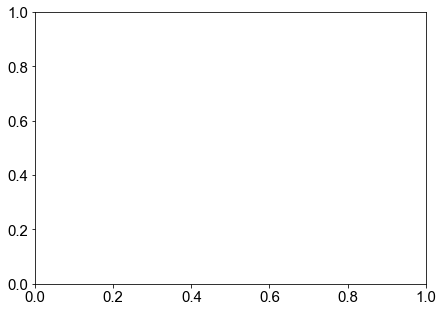

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeDataPredict/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        for seed in range(numseeds):
#             ax[nhi].plot(all_R2s[seed,:],linewidth=0.5)
            R2_v_dt=all_R2s[seed,:]
            maxidx=np.argmax(R2_v_dt)
            maxidx=1
            minidx=np.argmin(R2_v_dt)
            minidx=-1
            maxR2=R2_v_dt[maxidx]
            minR2=R2_v_dt[minidx]
            delta_R2s[seed,nhi] = maxR2-minR2

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\naccuracy gain $\Delta R^2$')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 0.7, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial_predict.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial_predict.svg',bbox_inches='tight',dpi=200)
plt.show()

            

1.0859318255000199e-08


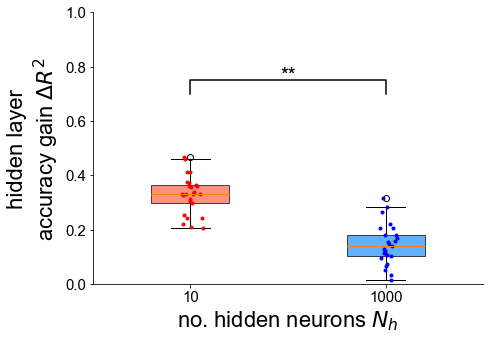

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 25
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_R2s = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                all_R2s[seed,dti] = r2_score(ytest,ypred)
        for seed in range(numseeds):
#             ax[nhi].plot(all_R2s[seed,:],linewidth=0.5)
            R2_v_dt=all_R2s[seed,:]
            maxidx=np.argmax(R2_v_dt)
            maxidx=1
            minidx=np.argmin(R2_v_dt)
            maxR2=R2_v_dt[maxidx]
            minR2=R2_v_dt[minidx]
            delta_R2s[seed,nhi] = maxR2-minR2

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\naccuracy gain $\Delta R^2$')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 0.7, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/accGain_boxplot_arial.svg',bbox_inches='tight',dpi=200)
plt.show()

            

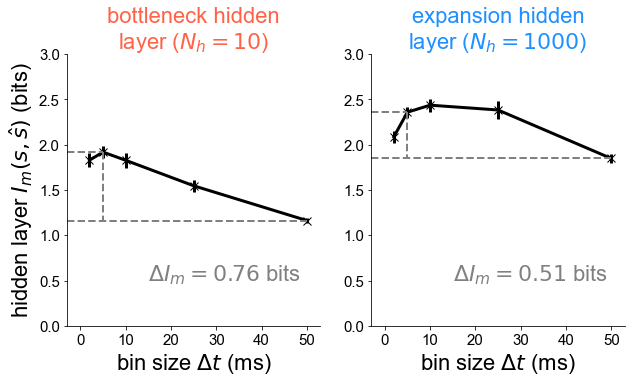

In [12]:
if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeDataPredict/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        mean_MIs = all_MIs.mean(axis=0)
        maxi = np.argmax(mean_MIs)
        maxi = 1
        high = mean_MIs[maxi]
        mini = -1
        low = mean_MIs[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        change = high-low
        ax[nhi].text(15,0.5,r'$\Delta I_m =%.2f$ bits'%change,color='gray',fontsize=22)

        sd_MIs = all_MIs.std(axis=0)
        sem_MIs = sd_MIs/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_MIs,sem_MIs,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
#         ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
#         ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(r'%s layer $I_m(s,\hat{s})$ (bits)'%(layerName))
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,3])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/MI_v_deltat_hidden_predict.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/MI_v_deltat_hidden_predict.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

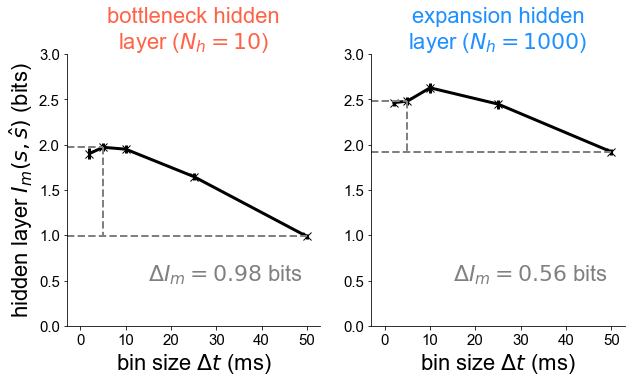

In [13]:
if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 25
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

colors=['tomato','dodgerblue']
tom=colors[0]
dod=colors[1]


fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('bottleneck hidden\nlayer ($N_h=10$)',color=tom)
ax[1].set_title('expansion hidden\nlayer ($N_h=1000$)',color=dod)
for li in range(len(layers)):
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        mean_MIs = all_MIs.mean(axis=0)
        maxi = np.argmax(mean_MIs)
        maxi = 1
        high = mean_MIs[maxi]
        mini = -1
        low = mean_MIs[mini]
        ax[nhi].hlines(high,-3,delta_t_list[maxi],linestyle='--',color='gray',linewidth=2)
        ax[nhi].hlines(low,-3,delta_t_list[mini],linestyle='--',color='gray',linewidth=2)
        ax[nhi].vlines(delta_t_list[maxi],high,low,linestyle='--',color='gray',linewidth=2)
        ax[nhi].set_xlim([-3,53])
        change = high-low
        ax[nhi].text(15,0.5,r'$\Delta I_m =%.2f$ bits'%change,color='gray',fontsize=22)

        sd_MIs = all_MIs.std(axis=0)
        sem_MIs = sd_MIs/np.sqrt(numseeds)
        ax[nhi].errorbar(delta_t_list,mean_MIs,sem_MIs,color='black',marker='x',linewidth=3,markersize=8,zorder=1)
#         ax[nhi].plot(delta_t_list[maxi],high,color='gray',marker='o',markersize=8,zorder=2)
#         ax[nhi].plot(delta_t_list[mini],low,color='gray',marker='o',markersize=8,zorder=2)
        if nhi == 0:
            ax[nhi].set_ylabel(r'%s layer $I_m(s,\hat{s})$ (bits)'%(layerName))
        if li == 0:
            ax[nhi].set_xlabel('bin size $\Delta t$ (ms)')
        ax[nhi].tick_params(axis='x')
        ax[nhi].tick_params(axis='y')
        ax[nhi].set_ylim([0,3])
        ax[nhi].set_xticks([0,10,20,30,40,50])
sns.despine()
# ax[0].legend(ncol=2,handles=[blue,magenta],bbox_to_anchor=(2.05,1.35),fontsize=18)

plt.savefig(f'lstmPlots/MI_v_deltat_hidden.svg',bbox_inches='tight',dpi=200)
plt.savefig(f'lstmPlots/MI_v_deltat_hidden.jpg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

0.02468309737596635


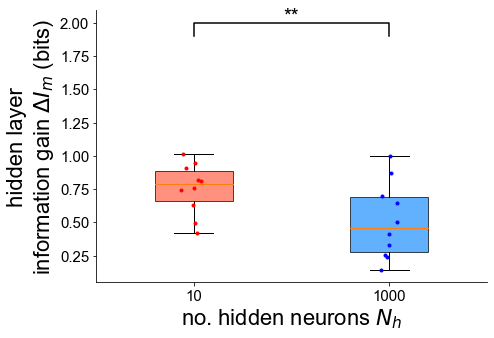

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 10
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeDataPredict/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        for seed in range(numseeds):
            MI_v_dt=all_MIs[seed,:]
#             maxidx=np.argmax(MI_v_dt)
            maxidx=1
            minidx=-1
            maxMI=MI_v_dt[maxidx]
            minMI=MI_v_dt[minidx]
            delta_R2s[seed,nhi] = maxMI-minMI

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
# plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\ninformation gain $\Delta I_m$ (bits)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
else:
    p='n.s.'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 1.9, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2.2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot_predict.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot_predict.svg',bbox_inches='tight',dpi=200)
plt.show()

            

5.582011725232132e-08


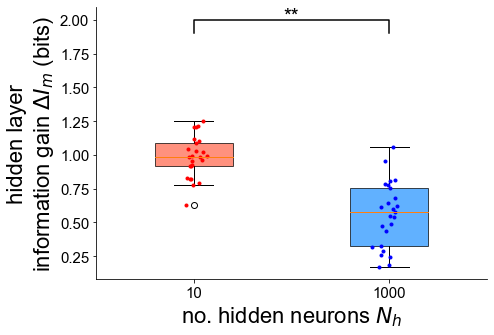

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import matplotlib.patches as mpatches

fig,ax=plt.subplots(figsize=(7,5))

if not os.path.exists('plotDir'):
    os.mkdir('plotDir')
    
delta_t_list = [2,5,10,25,50]
numDeltas = len(delta_t_list)
numseeds = 25
Nhvec = [10,1000]
layers = ['h']
layerNames = ['hidden']


pcon=0.3

colors = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
            (0.8, 0.47058823529411764, 0.7372549019607844)]
mag=colors[1]
blu=colors[0]

# maxidx=4
# minidx=-4



# fig,ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].set_title('bottleneck ($N_h=10$)',fontsize=15)
# ax[1].set_title('expansion ($N_h=1000$)',fontsize=15)
for li in range(len(layers)):
    delta_R2s=np.zeros((numseeds,len(Nhvec)))
    layer = layers[li]
    layerName = layerNames[li]
    for nhi in range(len(Nhvec)):
        
        nh = Nhvec[nhi]
        all_MIs = np.zeros((numseeds,numDeltas))
        for seed in range(numseeds):
            for dti in range(numDeltas):
                deltat = delta_t_list[dti]
                path = f'LSTMbayesdecodeData/Nh{nh}/pcon{pcon}/seed{seed}/deltat{deltat}'
                ytest_path = path + '/ytest.npy'
                ytest = np.load(ytest_path)
                ypred_path = path + f'/ypred_{layer}.npy'
                ypred = np.load(ypred_path)
                X = ytest.flatten()
                X = np.reshape(X,(len(X),1))
                y = ypred.flatten()
                all_MIs[seed,dti] = mutual_info_regression(X,y)[0]/np.log(2)
        for seed in range(numseeds):
            MI_v_dt=all_MIs[seed,:]
            maxidx=1
            minidx=-1
            maxMI=MI_v_dt[maxidx]
            minMI=MI_v_dt[minidx]
            delta_R2s[seed,nhi] = maxMI-minMI

bplot=plt.boxplot(delta_R2s,patch_artist=True,widths=0.4)
clrs=['tomato','dodgerblue']
for patch, color in zip(bplot['boxes'], clrs):
    patch.set(facecolor=color, alpha=0.7)
#     patch.set_facecolor(color)
#     [patch.set(facecolor='color', alpha=1.0) for patch in bp['boxes']]


clrs=['red','blue']
# plt.ylim([0,1])
for i in [1,2]:
    clr=clrs[i-1]
    y=delta_R2s[:,i-1]
    x=np.random.normal(i,0.03,size=len(y))
    plt.plot(x,y,color=clr,marker='.',linestyle='')
plt.ylabel('hidden layer\ninformation gain $\Delta I_m$ (bits)')
plt.xticks([1,2],[10,1000])
plt.yticks(fontsize=15)
plt.xlabel('no. hidden neurons $N_h$')

stat, pval = ranksums(delta_R2s[:,0], delta_R2s[:,1], alternative='greater')
if pval < 0.05:
    p='**'
print(pval)

x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 1.9, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2*h, p, ha='center', va='top', color=col, fontsize=20)

sns.despine()
# plt.savefig('plotDir/accGain_boxplot.jpg',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/infoGain_boxplot.svg',bbox_inches='tight',dpi=200)
plt.show()

            